Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

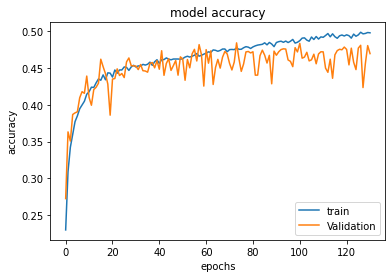

In [ ]:
#import thư viện
import numpy as np
import pandas as pd
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout
# #chia dữ liệu thành 2 tập train, test
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
# x_test,x_train là mảng 4 chiều để chuyển về 2 chiều ta lấy 32*32*3
x_train_new = x_train.shape
x_test_new = x_test.shape
x_train = x_train.reshape(-1,x_train_new[1]*x_train_new[2]*x_train_new[3])
x_test = x_test.reshape(-1,x_test_new[1]*x_test_new[2]*x_test_new[3])
# #chuẩn hóa
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
# #chuyển y thành 10 class
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
# tạo mạng noron
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(x_train_new[1]*x_train_new[2]*x_train_new[3],)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()
#chạy mô hình
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)])
#đánh giá mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('Final.h5')
model_ANN = load_model('Final.h5')

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "hung.png"
img = load_img(filename,target_size=(32,32))
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255

np.argmax(model_ANN.predict(img),axis=-1)

array([9])